In [3]:
# For tips on running notebooks in Google Colab, see
# https://docs.pytorch.org/tutorials/beginner/colab
%matplotlib inline

**Learn the Basics** \|\| [Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| [Datasets &
DataLoaders](data_tutorial.html) \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Learn the Basics
================

Authors: [Suraj Subramanian](https://github.com/subramen), [Seth
Juarez](https://github.com/sethjuarez/), [Cassie
Breviu](https://github.com/cassiebreviu/), [Dmitry
Soshnikov](https://soshnikov.com/), [Ari
Bornstein](https://github.com/aribornstein/)

Most machine learning workflows involve working with data, creating
models, optimizing model parameters, and saving the trained models. This
tutorial introduces you to a complete ML workflow implemented in
PyTorch, with links to learn more about each of these concepts.

We\'ll use the FashionMNIST dataset to train a neural network that
predicts if an input image belongs to one of the following classes:
T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker,
Bag, or Ankle boot.

[This tutorial assumes a basic familiarity with Python and Deep Learning
concepts.]{.title-ref}

Running the Tutorial Code
-------------------------

You can run this tutorial in a couple of ways:

-   **In the cloud**: This is the easiest way to get started! Each
    section has a \"Run in Microsoft Learn\" and \"Run in Google Colab\"
    link at the top, which opens an integrated notebook in Microsoft
    Learn or Google Colab, respectively, with the code in a fully-hosted
    environment.
-   **Locally**: This option requires you to setup PyTorch and
    TorchVision first on your local machine ([installation
    instructions](https://pytorch.org/get-started/locally/)). Download
    the notebook or copy the code into your favorite IDE.

How to Use this Guide
---------------------

If you\'re familiar with other deep learning frameworks, check out the
[0. Quickstart](quickstart_tutorial.html) first to quickly familiarize
yourself with PyTorch\'s API.

If you\'re new to deep learning frameworks, head right into the first
section of our step-by-step guide: [1. Tensors](tensorqs_tutorial.html).

::: {.toctree maxdepth="2" hidden=""}
quickstart\_tutorial tensorqs\_tutorial data\_tutorial
transforms\_tutorial buildmodel\_tutorial autogradqs\_tutorial
optimization\_tutorial saveloadrun\_tutorial
:::


# Tensors

In [4]:
import torch
import numpy as np

In [5]:
# Initializing directly from data
data = [[1,2], [3,4]]
x_data = torch.tensor(data)

In [6]:
# Initializing from a numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [7]:
# Initializing from another tensor
x_ones = torch.ones_like(x_data) # retains the property of x_data
print(f"Ones Tensor: \n{x_ones}\n")

x_rand = torch.rand_like(x_data, dtype = torch.float) #overrides the datatype of x_data
print(f"Random Tensor\n{x_rand}\n")

Ones Tensor: 
tensor([[1, 1],
        [1, 1]])

Random Tensor
tensor([[0.5624, 0.9134],
        [0.4094, 0.3858]])



In [8]:
# Initializing with random or constant values

shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Randome Tensor: \n{rand_tensor}\n")
print(f"Ones Tensor: \n{ones_tensor}\n")
print(f"Zeros Tensor: \n{zeros_tensor}\n")

Randome Tensor: 
tensor([[0.8992, 0.3337, 0.8256],
        [0.6420, 0.0016, 0.8631]])

Ones Tensor: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Zeros Tensor: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])



In [9]:
# Attributes of a Tensor
tensor = torch.rand(3,4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [10]:
# Operations on Tensors

if torch.accelerator.is_available():
  tensor = tensor.to(torch.accelerator.current_accelerator())


In [11]:
# Standard numpy-like indexing and slicing:
tensor = torch.ones(4,4)
print(f"First row: {tensor[0]}")
print(f"First column {tensor[:,0]}")
print(f"Last column {tensor[...,-1]}")
tensor[:,1]=0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column tensor([1., 1., 1., 1.])
Last column tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [12]:
# Joining tensors: torch.cat to concatenate a sequence of tensors, also torch.stack
t1 = torch.cat([tensor, tensor, tensor], dim = 1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [14]:
# Arithmetic operations
# `` tensor.T`` returns the transpose of a tensor

y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
print(tensor, tensor.T)
print(y1,y2)
torch.matmul(tensor, tensor.T, out = y3)
print(y3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) tensor([[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [15]:
# single-element tensors
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [16]:
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [17]:
# In-place operation, store the result into the operand, denoted by a _ suffix. like x.copy_(y), x.t_() will change x.
print(f"{tensor}")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [18]:
# Bridge with Numpy: tensors on the cpu and numpy arrays can share their underlying memory locations, change one will change the other.
# Tensor to Numpy array
t = torch.ones(5)
print(f"t:{t}")
n = t.numpy()
print(f"n:{n}")

t:tensor([1., 1., 1., 1., 1.])
n:[1. 1. 1. 1. 1.]


In [19]:
# a change in the tensor reflects in the numpy array
t.add_(1)
print(f"t:{t}")
print(f"n:{n}")

t:tensor([2., 2., 2., 2., 2.])
n:[2. 2. 2. 2. 2.]


In [20]:
# numpy array to tensor, changes in the numpy array reflects in the tensor
n = np.ones(5)
t = torch.from_numpy(n)
np.add(n, 1, out = n)
print(f"t:{t}")
print(f"n:{n}")

t:tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n:[2. 2. 2. 2. 2.]


# Datasets & DataLoaders

In [21]:
# Target to decouple the dataset code and model training code for better readability and modularity.
# torch.utils.data.DataLoader and torch.utils.data.Dataset: to use pre-loaded datasets and your own data,
# Dataset stores the samples and their corresponding labels, DataLoader wraps an iterable around the Dataset
# to enable easy access to the samples

In [28]:
# Loading a Dataset
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download=True,
    transform=ToTensor()
)

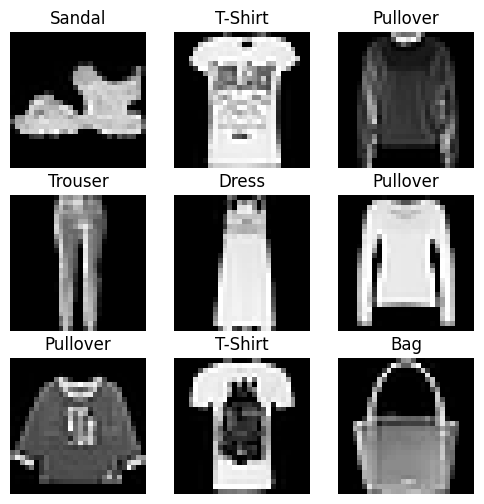

In [25]:
# Iterating and visualizing the Dataset: we can index Datasets like training_data[index]
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(6,6))
cols, rows = 3,3
for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_data), size = (1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

In [26]:
"""
Creating a Custom Dataset for your files
A custom dataset class must implement three functions: __init__, __len__, and __getitem__.
"""

'\nCreating a Custom Dataset for your files\nA custom dataset class must implement three functions: __init__, __len__, and __getitem__. \n'

In [27]:
"""
Preparing your data for training with DataLoaders.
Dataset will retrieves dataset's feature and label one sample at a time.
But to pass samples in minibatches, and reshuffle the data at every epoch to reduce model overfitting,
by using python's multiprocessing to speed up data retrieval.
"""

"\nPreparing your data for training with DataLoaders.\nDataset will retrieves dataset's feature and label one sample at a time. \nBut to pass samples in minibatches, and reshuffle the data at every epoch to reduce model overfitting, \nby using python's multiprocessing to speed up data retrieval.\n"

In [29]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)


Feature batch shape: torch.Size([64, 1, 28, 28])
Feature batch shape: torch.Size([64])


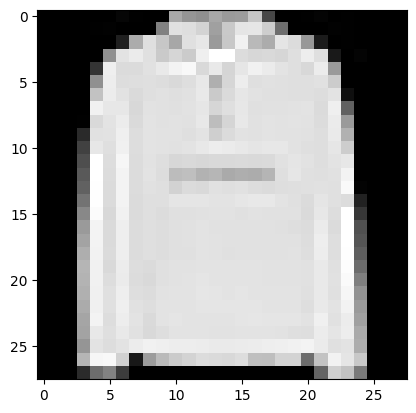

Label: 2


In [30]:
# Iterate through the DataLoader
# Each iteration below returns a batch of train_features and train_labels, which contains batch_size features
# and labels respectively.

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Feature batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Transforms

In [33]:
# Use transform to perform some manipulation of the data and make it suitable for training.
# All torchVision datasets have two parameters - transform to modify the features and target_transform to modify the labels.
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)


In [34]:
"""
ToTensor()
 Convert a PIL image or numpy ndarray into a FloatTensor, and scales the image's pixel intensity values in the range [0.,1.]
"""

"\nToTensor()\n Convert a PIL image or numpy ndarray into a FloatTensor, and scales the image's pixel intensity values in the range [0.,1.]\n"

In [37]:
# Lambda Transforms
"Lambda transforms apply any user-defined lambda function"
target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter_(dim=0, index = torch.tensor(y), value=1))
print(target_transform)

Lambda()


# Build the Neural Network

Neural networks comprise of layers/modules that perform operations on data.

torch.nn provides all the building blocks you need to build your own neural network. Every module in pytorch subclasses the nn.Module. A neural network is a module itself that consists of other modules(layers). this nested structure allows for building and managing complex architectures easily.

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
# Get device for Training
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [15]:
# Define the Class: by subclassing nn.Module, initialize the neural network layer in __init__.
# Every nn.Module subclass implements the operations on input data in the forward method.

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [16]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [18]:
# To use the model. we pass it the input data. this executes the model's forward,
# along with some background operations. do not call model.forward() directly.
""" Calling the model on the input returns a 22-dimensional tensor with dim=0 corresponding to each output
of 10 raw predicted values for each class, and dim = 1 corresponding to the individual values of each output.
we get the prediction probabilities by passing it through an instance of the nn.Softmax module."""
X = torch.rand(1,28,28, device = device)
logits = model(X)
print(logits)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

tensor([[-0.0485,  0.0229, -0.0638, -0.0505,  0.1250, -0.0593, -0.0147,  0.0962,
          0.1547,  0.0942]], grad_fn=<AddmmBackward0>)
Predicted class: tensor([8])


In [19]:
# Model Layers
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [20]:
# nn.Flatten: example to convert a 2D 28*28 image into a contiguous array of 784 pixel values
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())


torch.Size([3, 784])


In [27]:
# nn.Linear: applies a linear transformation on the input using its stored weights and biases
layer1 = nn.Linear(in_features = 28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [30]:
# nn.ReLU: Non-linear activations are what create the complex mappings between the model's inputs and outputs.
# applied after linear transformation to introduce nonlinearity, helping nn learn a wide varity of phenomena.
print(f"Before ReLU: {hidden1}, {hidden1.size()}")

hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}, {hidden1.size()}")


Before ReLU: tensor([[0.0519, 0.0000, 0.1881, 0.0000, 0.5788, 0.0000, 0.3735, 0.2277, 0.0000,
         0.0323, 0.0000, 0.0000, 0.0254, 0.6520, 0.0086, 0.1952, 0.0000, 0.4234,
         0.2610, 0.2590],
        [0.0058, 0.0000, 0.4677, 0.0000, 0.1608, 0.0000, 0.1261, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.3663, 0.2406, 0.3188, 0.0000, 0.4090,
         0.4362, 0.2828],
        [0.0000, 0.0000, 0.4049, 0.0849, 0.4178, 0.0000, 0.1921, 0.0806, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.2279, 0.0000, 0.3913, 0.0000, 0.1732,
         0.0244, 0.3129]], grad_fn=<ReluBackward0>), torch.Size([3, 20])
After ReLU: tensor([[0.0519, 0.0000, 0.1881, 0.0000, 0.5788, 0.0000, 0.3735, 0.2277, 0.0000,
         0.0323, 0.0000, 0.0000, 0.0254, 0.6520, 0.0086, 0.1952, 0.0000, 0.4234,
         0.2610, 0.2590],
        [0.0058, 0.0000, 0.4677, 0.0000, 0.1608, 0.0000, 0.1261, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.3663, 0.2406, 0.3188, 0.0000, 0.4090,
         0.436

In [37]:
#nn.Sequential: is an ordered container of modules, data is passed through all the modules in the same order
#as defined, we can use sequential container to put together a quick network like seq_modules
seq_modules = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features = 28*28, out_features=20),
    nn.ReLU(),
    nn.Linear(20, 10)
)

input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
print(logits)

tensor([[-0.0076,  0.1658,  0.1552, -0.0835, -0.0983, -0.2042, -0.0103,  0.1209,
         -0.0239,  0.2084],
        [-0.1794,  0.2357,  0.3217, -0.0959, -0.1305, -0.0709, -0.1747, -0.0491,
          0.0211,  0.2486],
        [-0.0306,  0.1775,  0.1982, -0.0815, -0.1139, -0.1585, -0.0164,  0.0892,
         -0.1069,  0.1777]], grad_fn=<AddmmBackward0>)


In [38]:
# nn.Softmax: the last linear layer of the nn returns logits - raw values in [-infty, infty]. the logits
# are scaled to value [0,1] representing the model's predicted probabilities for each class.
# dim indicates the dimension along which the values must sum to 1

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(pred_probab)

tensor([[0.0963, 0.1145, 0.1133, 0.0892, 0.0879, 0.0791, 0.0960, 0.1095, 0.0947,
         0.1195],
        [0.0812, 0.1230, 0.1340, 0.0883, 0.0853, 0.0905, 0.0816, 0.0925, 0.0992,
         0.1246],
        [0.0949, 0.1168, 0.1193, 0.0902, 0.0873, 0.0835, 0.0962, 0.1070, 0.0879,
         0.1169]], grad_fn=<SoftmaxBackward0>)


In [39]:
# Model Parameters, weights and biases that are optmized during training, nn.Module automatically tracks
# all fields defined inside the model object, all parameters accessible using parameters() or named_parameters()
print(f"Model structure: {model}")
for name, param in model.named_parameters():
  print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]}")


Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[ 0.0058,  0.0059,  0.0259,  ..., -0.0035, -0.0102, -0.0234],
        [-0.0168,  0.0322, -0.0006,  ...,  0.0120,  0.0199, -0.0164]],
       grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([-0.0334,  0.0191], grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[-0.0119,  0.0031,  0.0242,  ...,  0.0351,  0.0374,  0.0317],
        [-0.0171, -0.0202,  0.0033,  ...,  0.0329,  0.0370, -0.0020]],
       grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.2.bias | Size: torch

# Automatic Differentiation with torch.autograd

When training neural networks, the most frequently used algo is back propogation. in this algo, parameters(model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

Pytorch use a built-in differentiation engine torch.autograd to compute gradients for any computational graph.

In [47]:
import torch
x = torch.ones(5) # input tensor
y = torch.zeros(3) # expected output
w = torch.randn(5,3, requires_grad = True)
b = torch.randn(3, requires_grad = True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7b227aebbbe0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7b227b2adc60>


Computing Gradients

To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function with respect to parameters, to compute derivatives, we call loss.backward() and then retrieve the values from w.grad and b.grad.

We can only obtain the grad properties for the leaf nodes of the computational graph, which have requirs_grad property set to True.

We can only perform gradient calculations using backward **once** on a given graph, need to pass retain_graph = True to the backward call if need to do several backward calls on the same graph.

In [49]:
loss.backward(retain_graph=True)
print(w.grad)
print(b.grad)

tensor([[0.1394, 0.3008, 0.6490],
        [0.1394, 0.3008, 0.6490],
        [0.1394, 0.3008, 0.6490],
        [0.1394, 0.3008, 0.6490],
        [0.1394, 0.3008, 0.6490]])
tensor([0.1394, 0.3008, 0.6490])


Disabling Gradient Tracking

All tensors with requires_grad = True are tracking their computational history and support gradient computation. if we don't want to do that like just want to apply a trained model to some input data. we only want to do forward computations through the network. We can stop tracking computations by surrounding our computations code with **torch.no_grad()** block.

In [50]:
z = torch.matmul(x,w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x,w)+b
print(z.requires_grad)

True
False


Another way to achieve same effect as torch.no_grad() is to use the detach() method on the tensor.

In [51]:
z = torch.matmul(x,w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


When need to disable gradient tracking:
1. to make some parameters in your neural network as frozen parameters
2. To speed up computtions when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.

MISSING
Optional Reading: Tensor Gradients and Jacobian Products

# Optimizing Model Parameters

Training a model is an iterative process, in each iteration the model make a guess about the output, calculate the error in its guess(loss), collects the derivatives of the error with respect to its parameters, and optimize these parameters using gradient descent.

In [5]:
# Prerequisite Code
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)
train_dataloader = DataLoader(training_data, batch_size = 64)
test_dataloader = DataLoader(test_data, batch_size = 64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
          nn.Linear(28*28, 512),
          nn.ReLU(),
          nn.Linear(512, 512),
          nn.ReLU(),
          nn.Linear(512, 10)
       )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
model = NeuralNetwork()

In [6]:
# Hyperparameters
"""Hyperparameters are adjustable parameters that let you control the model optimization process.
Different hyperparameter values can impact model training and convergence rates. Hyperparameters:
1) Number of Epochs: the number of times to iterate over the dataset
2) Batch Size: the number of data samples propagated through the network before the parameters are updated.
3) Learning Rate: how much to update models parameters at each batch/epoch.
"""

learning_rate = 1e-3
batch_size = 64
epochs = 5

Optimization Loop

Each iteration of the optimization loop is called an epoch, Each epoch consists of two main parts:
1) The Train Loop: iterate over the training dataset and try to converge to optimal parameters
2) The Validation/Test Loop: iterate over the test dataset to check if model performance is improving.

Loss Function
When presented with some training data, our untrained network is likely not to give the correct answer. Loss
Function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the iputs of our given data sample and compare it against the true data label value. Loss Function:
1) nn.MSELoss(Mean Square Error): for regression tasks
2) nn.NLLLoss(Negative Log Likelihood): for classification.
3) nn.CrossEntropyLoss: combines nn.LogSoftmax and nn.NLLLoss.


In [8]:
# Initialize the loss function.
loss_fn = nn.CrossEntropyLoss()

**Optimizer**

Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed. All optimization logic is encapsulated in the optimizer object.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing in the learning rate hyperparameter.

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Inside the training loop, optimization happens in three steps:
1) Call optimizer.zero_grad() to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteraion.
2) Backpropagate the prediction loss with a call to loss.backward().
3) Once we have gradients, we call optimizer.step() to adjust the parameters by the gradients collected in the backward pass.

In [15]:
# Full Implementation
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # set the model to training mode - important for batch normalization and dropout layers
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch*batch_size+len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode
    model.eval()

    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensure that no gradients are computed during test mode
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /=size
    print(f"Test Error: \n Accuracy: {(100*correct):0.1f}%, Avg loss: {test_loss:>8f} \n")

In [14]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301873 [   64/60000]
loss: 2.290184 [ 6464/60000]
loss: 2.278075 [12864/60000]
loss: 2.268346 [19264/60000]
loss: 2.239050 [25664/60000]
loss: 2.218196 [32064/60000]
loss: 2.218289 [38464/60000]
loss: 2.192700 [44864/60000]
loss: 2.190942 [51264/60000]
loss: 2.147700 [57664/60000]
Test Error: 
 Accuracy: 47.4%, Avg loss: 0.013944 

Epoch 2
-------------------------------
loss: 2.167764 [   64/60000]
loss: 2.155818 [ 6464/60000]
loss: 2.104565 [12864/60000]
loss: 2.112669 [19264/60000]
loss: 2.050687 [25664/60000]
loss: 1.999017 [32064/60000]
loss: 2.015418 [38464/60000]
loss: 1.945928 [44864/60000]
loss: 1.942126 [51264/60000]
loss: 1.865056 [57664/60000]
Test Error: 
 Accuracy: 59.3%, Avg loss: 0.012234 

Epoch 3
-------------------------------
loss: 1.906806 [   64/60000]
loss: 1.879015 [ 6464/60000]
loss: 1.760952 [12864/60000]
loss: 1.792804 [19264/60000]
loss: 1.675062 [25664/60000]
loss: 1.636010 [32064/60000]
loss: 1.641592 [38464/

# Save & Load Model

In [16]:
import torch
import torchvision.models as models


In [18]:
# Saving and Loading Model Weights
# Pytorch models store the learned parameters in an internal state dictionary,
# called state_dict, which can be persisted via torch.save
model = models.vgg16(weights = "IMAGENET1K_V1")
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:07<00:00, 70.9MB/s]


In [20]:
# To load model weights, need to create an instance of the same model first,
# then load the parameters using load_state_dict(), set weights_only = True to limit the functions
# executed during unpickling to only those necessary for loading weights

model = models.vgg16()
model.load_state_dict(torch.load('model_weights.pth', weights_only=True))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [21]:
# Saving and loading models with Shapes
torch.save(model, 'model.pth')

In [22]:
model = torch.load('model.pth', weights_only=False)